# 국민청원 사이트 글 가져와서 분석하기

In [32]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from konlpy.tag import Mecab
from konlpy.tag import Okt


driver = webdriver.Chrome(executable_path='./chromedriver.exe')
url = "https://www1.president.go.kr/petitions/?c=37&only=2&page=1&order=1"
driver.get(url)
time.sleep(3)

m = Mecab('C:\\mecab\\mecab-ko-dic')



# 청와대에 있는 글을 하나하나 씩 글 가져오기
# 페이지 글을 가져오기

count = 1
count2 = 0
mLists = ''

for i in range(10,12):
    if i == 11:
        pageNext = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[4]/div/div[2]/a')
        pageNext.click()
        count += 1
        time.sleep(3)
        break
    for j in range(5,8):
        page = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li[{}]/div/div[2]/a'.format(j))
        page.click()
        time.sleep(3)
        pageText = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]')
#       print(pageText.text)
        mLists += pageText.text
        driver.back()
        time.sleep(3)

    pageNext = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[4]/div/div[{}]/a[{}]'.format(count,i))
    pageNext.click()
    time.sleep(3)


mLists = mLists.replace('*','')
mLists = mLists.replace('(','')
mLists = mLists.replace(')','')
mLists = mLists.replace('[본 게시물의 일부 내용이 국민 청원 요건에 위배되어 관리자에 의해 수정되었습니다]','')

# print(contents)
driver.close()
words = m.pos(mLists)


nouns = ['NNG', 'NNB', 'NNP', 'NP', 'VA']

nounList = []
for word in words:
    if word[1] in nouns and len(word[0]) > 1:
#         print(word[0])
        nounList.append(word[0])
        
counts = Counter(nounList)  
print(len(counts))
top200 = counts.most_common(200)
print(top200)

<ipython-input-32-83d75f94869f>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver.exe')
<ipython-input-32-83d75f94869f>:32: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  page = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li[{}]/div/div[2]/a'.format(j))
<ipython-input-32-83d75f94869f>:35: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  pageText = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]')
<ipython-input-32-83d75f94869f>:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  pageNext = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]

428
[('택배', 45), ('업무', 17), ('노조', 14), ('코로나', 12), ('직원', 12), ('배송', 11), ('자신', 10), ('분류', 10), ('회사', 9), ('구역', 9), ('당번', 8), ('답변', 8), ('확진', 8), ('제외', 8), ('개인', 8), ('사업자', 8), ('기사', 8), ('시험', 8), ('발생', 7), ('비용', 7), ('근로', 6), ('기준', 6), ('지원', 6), ('시간', 6), ('국민', 6), ('과로사', 6), ('산업', 6), ('작업', 6), ('보상', 5), ('관리', 5), ('경영', 5), ('아침', 5), ('주장', 5), ('상황', 5), ('출근', 5), ('시작', 5), ('사람', 5), ('하차', 5), ('물량', 5), ('도우미', 5), ('수익', 5), ('추가', 5), ('체온', 4), ('동안', 4), ('문제', 4), ('팀장', 4), ('당일', 4), ('안정', 4), ('피해', 4), ('물건', 4), ('본인', 4), ('할당', 4), ('터미널', 4), ('투자', 4), ('행정', 4), ('수험', 4), ('구매', 3), ('강요', 3), ('해당', 3), ('근무', 3), ('내용', 3), ('경우', 3), ('최근', 3), ('자발', 3), ('참여', 3), ('공정', 3), ('계속', 3), ('확인', 3), ('안전', 3), ('모두', 3), ('운영', 3), ('이해', 3), ('중요', 3), ('의도', 3), ('진행', 3), ('청원', 3), ('대한민국', 3), ('취업', 3), ('쟁의', 3), ('소터', 3), ('방식', 3), ('평균', 3), ('시국', 3), ('배치', 3), ('트럭', 3), ('만큼', 3), ('때문', 3), ('물동량', 3), ('보통', 3), 

In [29]:
from selenium import webdriver
import time
from konlpy.tag import Mecab
from collections import Counter


m = Mecab('C:\\mecab\\mecab-ko-dic')

driver = webdriver.Chrome(executable_path = './chromedriver.exe')
url = "https://www1.president.go.kr/petitions/?c=37&only=1&page=1&order=1"
driver.get(url)
contents = ''
for i in range(1,8):
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li['+str(i)+']/div/div[2]/a').click()
    time.sleep(3)
    content = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]').text
    contents += content
#     print(content)
    driver.back()


contents = contents.replace('*','')
contents = contents.replace('(','')
contents = contents.replace(')','')
contents = contents.replace('[본 게시물의 일부 내용이 국민 청원 요건에 위배되어 관리자에 의해 수정되었습니다]','')

# print(contents)
driver.close()
words = m.pos(contents)


nouns = ['NNG', 'NNB', 'NNP', 'NP', 'VA']

nounList = []
for word in words:
    if word[1] in nouns and len(word[0]) > 1:
#         print(word[0])
        nounList.append(word[0])
        
counts = Counter(nounList)  
print(len(counts))
top200 = counts.most_common(200)
print(top200)

<ipython-input-29-d69f1aec03f0>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = './chromedriver.exe')
<ipython-input-29-d69f1aec03f0>:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div/div/div[2]/div[2]/div[4]/div/div[2]/div[2]/ul/li['+str(i)+']/div/div[2]/a').click()
<ipython-input-29-d69f1aec03f0>:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  content = driver.find_element_by_xpath('//*[@id="cont_view"]/div[2]/div[1]/div/div[1]/div/div[4]/div[2]').text


449
[('저희', 21), ('작업', 15), ('상황', 12), ('코로나', 12), ('계약', 11), ('제외', 10), ('설계사', 10), ('가동', 9), ('보험', 9), ('호기', 8), ('대통령', 8), ('당시', 7), ('업체', 7), ('지급', 7), ('때문', 7), ('소득', 7), ('영업', 7), ('퇴직금', 7), ('진행', 6), ('긴급', 6), ('투입', 6), ('현장', 6), ('내용', 6), ('마음', 6), ('고용', 6), ('생각', 6), ('어머니', 6), ('환자', 6), ('지원금', 6), ('요양', 6), ('직원', 5), ('과정', 5), ('작업자', 5), ('준비', 5), ('보일러', 5), ('이상', 5), ('장비', 5), ('근무', 5), ('기성', 5), ('발생', 5), ('인건비', 5), ('사람', 5), ('부모', 5), ('편의점', 5), ('이유', 5), ('소상', 5), ('공인', 5), ('고객', 5), ('확진', 5), ('해당', 5), ('보호사', 5), ('공사', 4), ('공정', 4), ('야간', 4), ('온도', 4), ('열기', 4), ('원청', 4), ('재비', 4), ('경비', 4), ('금액', 4), ('우리', 4), ('추가', 4), ('설치', 4), ('자재', 4), ('자영업', 4), ('힘들', 4), ('보장', 4), ('수많', 4), ('대상', 4), ('국방부', 4), ('결정', 4), ('이전', 4), ('생계', 4), ('당선인', 4), ('국민', 4), ('센터', 4), ('전달', 4), ('동안', 4), ('담당자', 4), ('급여', 3), ('중단', 3), ('사항', 3), ('계획', 3), ('인원', 3), ('보온', 3), ('청사', 3), ('문제', 3), ('취지', 3), ('중간'

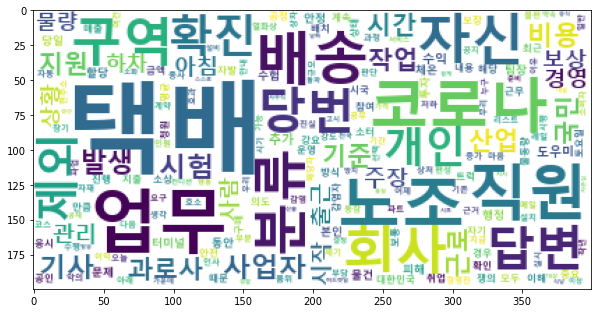

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(font_path='C://indows/Fonts/malgunbd.ttf', 
                       background_color='white', max_font_size=72)
cloud = word_cloud.generate_from_frequencies(dict(counts))
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.show()